# Word2vec application tutorial
広島大学 大学院統合生命科学研究科 数理生命科学プログラム
「高次元生命情報の数理」
created by @carushi

参考文献:
- 元論文 ["Efficient Estimation of Word Representations in Vector Space"](https://arxiv.org/abs/1301.3781)
- ワークフロー参考 "Pytorch 自然言語処理プログラミング" 新納浩幸

2025.01.16

## 目的
Word2vecを使って、データセットの取得や単語・文章の潜在空間への埋め込みのイメージを掴もう。

## やること
* コーパスとなるデータを取得する
* 分かち書きに変換する
* gensimを使ってモデルを作成する
* 単語や文章を与えて、それと近しい単語の探索や、単語の潜在空間上での四則演算を行ってみる

## さいごに
みなさんにそれぞれ「どんなデータ」を使って学習を行い、「どんな単語の埋め込みをしてみたか」や「どんな四則演算をしてみたか」を発表してもらいます。
意外な面白い結果が得られることを期待しています。



# 学習データセット
1. https://github.com/Kyubyong/wordvectors?tab=readme-ov-file - wikipediaデータベースを用いた事前学習済みデータ
2. 任意の学習済みモデル
3. 任意のテキストデータ

自分でテキストデータを用意する場合には、「クローリング」「スクレイピング」「コーパス」などのキーワードを使ってやり方を検索してください。大規模なクロールデータには https://commoncrawl.org/ などがあります。

## 1 and 2 学習済みのモデルを用いる場合

まず取得したデータセットを解凍したら、下のセルを走らせてから選択して、Google collaboratoryにアップロードします。

In [ ]:
from google.colab import files
files.upload()

アップロードには時間がかかるため、Google driveの容量に空きがあれば、そちらにアップロードしてからマウントした方が早いです。

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [5]:
## アップロードしたフォルダーのパス
%ls /content/drive/MyDrive/ja

ja.bin  ja.bin.syn0.npy  ja.bin.syn1neg.npy  ja.tsv


1のモデルを使う場合には、特別に古いバージョンのgensimをインストールします。自分で見つけた新しいモデルを使う場合には不要です。

In [4]:
# !pip install gensim==3.8.3
!pip install --use-pep517 gensim==3.8.0 scipy==1.10.1



collectionsの現在の実装と一致しない部分があるため、↓を実行するとエラーがでます。

エラーが出たら、その行が存在するファイル名（例：/usr/local/lib/python3.11/dist-packages/gensim/models/word2vec.py）をクリックすると右側にエディターが表示されますので、該当の行を以下のように書き換えてください。

```
from collections.abc import Mapping
from collections import defaultdict
from collections import namedtuple, defaultdict
from collections.abc import Iterable
from collections.abc import Iterable
```

(参照：https://zenn.dev/dzonesasaki/articles/eba660de8349ce)

In [9]:
import gensim
from gensim import Word2Vec, word2vec

In [50]:
# アップロードしたフォルダーのja.binモデルをロードする
# Load Google's pre-trained Word2Vec model.
model = Word2Vec.load('/content/drive/MyDrive/ja/ja.bin')

# If it doesn't work, use this.
# gensim.models.KeyedVectors.load_word2vec_format('ja.bin', binary=True)

/usr/local/lib/python3.11/dist-packages/gensim/models/base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


## 3 任意のテキストデータから学習する場合

下の2つのセルのうち一つを走らせて、テキストファイルをアップロードするか、グーグルドライブをマウントしてファイルにアクセスできるようにしてください。

In [ ]:
from google.colab import files
files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


次にMecabを使って、文章を単語ごとに分割した分かち書きテキストを作成します。

In [26]:
%pip install mecab-python3
%pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=9487977158522a4419a07467dce33b17664755008b259fac6f884cbed2917de1
  Stored in directory: /root/.cache/pip/wheels/b7/fd/e9/ea4459b868e6d2902e8d80e82dbacb6203e05b3b3a58c64966
Successfully built unidic-lite


In [27]:
import MeCab

In [28]:
wakati = MeCab.Tagger("-Owakati")

In [29]:
with open("input.txt") as f:
  with open("wakati.txt", "w") as of:
    for line in f.readlines():
      of.write(wakati.parse(line))

In [32]:
# 現在地
%pwd
# 存在するファイル
%ls

drive/  sample_data/  wakati.txt


## 3' 生命・情報関連の研究グラントの概要から学習する場合
以下に私の方で作成した分かち書きに変換済みの生命・情報関係の研究費申請書（採択されたもの）のデータセットとモデルもアップロードしてありますので、ダウンロードして使ってみてください。（授業内での利用に留めてください）

テキスト：https://www.dropbox.com/scl/fi/6672ulb2inn6n5jrga9dv/wakati.txt?rlkey=xnhezkgxnxq6isjjfu8qk04ti&dl=0

モデル：https://www.dropbox.com/scl/fi/x14368352h5tqtu79rflx/myw2v.bin?rlkey=0tsnb88dzh7yy8zpqf0ekaqx6&dl=0

### 作成方法
* CiNiiデータベースに保存されたグラントのタイトル及びアウトライン
  * 全文検索に対して生命 or 情報のキーワードでヒットした81708件（2010-2024年に限定）
  * 200\*50件表示が限度のようだったので、新しいものから大体2022年までのもの10000件（200*50）に関して CiNiiから文献idをTSV形式でダウンロード
  * APIを使って各グラント情報をRDF形式でダウンロードし、スクリプトでタイトルとアウトラインを抽出
  * mecabを使って分かち書きに変換（wakati.txt）

In [17]:
with open("wakati.txt") as f:
  for line in f.readlines():
      print(line.rstrip('\n').split(' '))
      break

['生理', '機能', '計測', 'による', '能動', '学習', '効果', 'の', '客観', '的', 'な', '検証', '方法', 'の', '確立', 'と', '協', '働', '学習', 'モデル', 'の', '構築', '']


## 3.5 モデルの作成
分かち書きができたら、wakati.txtのテキストデータを使ってモデルを学習していきます。（時間がかかります）

In [33]:
from gensim.models import word2vec, Word2Vec

In [34]:
sens = word2vec.LineSentence('wakati.txt')
model = Word2Vec(sens)

/usr/local/lib/python3.11/dist-packages/gensim/models/base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [35]:
model.save('myw2v.bin')

In [41]:
model = Word2Vec.load('myw2v.bin')

# 学習したモデルをつかって単語の潜在空間を探索する

In [42]:
model

Wikipediaのコーパスを使った場合

In [ ]:
model.wv.most_similar(positive=['東京', '大阪'], negative=['日本'])

[('名古屋', 0.6242502927780151),
 ('京都', 0.512305736541748),
 ('守口', 0.5011244416236877),
 ('中京', 0.4630984663963318),
 ('福岡', 0.4607725739479065),
 ('とうきょう', 0.4605318307876587),
 ('さいたま', 0.44708847999572754),
 ('はさいたま', 0.44614657759666443),
 ('城南', 0.444580078125),
 ('和光', 0.44234994053840637)]

In [57]:
model.wv.most_similar('左', topn=10)

[('右', 0.919243335723877),
 ('右端', 0.5390413403511047),
 ('右左', 0.4985501170158386),
 ('右側', 0.4926408529281616),
 ('京山', 0.491138756275177),
 ('左側', 0.4865301847457886),
 ('左前', 0.44742995500564575),
 ('上端', 0.44724756479263306),
 ('右前', 0.4472012519836426),
 ('中段', 0.4444594085216522)]

研究費の申請書のコーパスを使った場合

In [43]:
model.wv.most_similar('遺伝子', topn=10)

[('変異', 0.7713030576705933),
 ('因子', 0.7610106468200684),
 ('発現', 0.7430205345153809),
 ('RNA', 0.7421243190765381),
 ('ゲノム', 0.7349221706390381),
 ('タンパク質', 0.7328944206237793),
 ('配列', 0.719386875629425),
 ('DNA', 0.6910491585731506),
 ('エピゲノム', 0.6750292778015137),
 ('酵素', 0.6671015024185181)]

In [ ]:
model.wv.most_similar('RNA', topn=10)

[('DNA', 0.8396138548851013),
 ('タンパク質', 0.8388374447822571),
 ('塩基', 0.8298845887184143),
 ('アミノ酸', 0.822223961353302),
 ('mRNA', 0.821994423866272),
 ('鎖', 0.8218508958816528),
 ('核酸', 0.8201552629470825),
 ('配列', 0.8115821480751038),
 ('糖', 0.8071279525756836),
 ('エクソソーム', 0.8014001250267029)]

In [ ]:
model.wv.most_similar('エピゲノム', topn=10)

[('転写', 0.7654228210449219),
 ('塩基', 0.746963381767273),
 ('RNA', 0.7415634393692017),
 ('mRNA', 0.7248097062110901),
 ('エクソソーム', 0.712428867816925),
 ('発現', 0.705120325088501),
 ('プロファイル', 0.7047804594039917),
 ('局在', 0.7014954686164856),
 ('配列', 0.6936433911323547),
 ('ヒストン', 0.6935053467750549)]

In [ ]:
model.wv.most_similar('機械', topn=10)

[('深層', 0.942145049571991),
 ('強化', 0.7322642803192139),
 ('マルチタスク', 0.7020169496536255),
 ('連合', 0.6604371070861816),
 ('嫌悪', 0.656015932559967),
 ('ログ', 0.6528156399726868),
 ('要領', 0.6176374554634094),
 ('類推', 0.6006132364273071),
 ('AI', 0.5803837180137634),
 ('教師', 0.5769829750061035)]

# 学習したモデルをつかって文章の潜在空間を探索する

単語だけでなく、文章レベルでの埋込を行うこともできます。
以下にコードの例を示しました。
グラントの申請書から学習されたモデルmyd2v.binを以下にアップロードしたので、試してみてください。

https://www.dropbox.com/scl/fi/1axplayefxtosqar0yng6/myd2v.bin?rlkey=pakxlonpuyalxg113s0l2cxjl&dl=0

In [65]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [68]:
f = open('wakati.txt', 'r')
db_docs = [ TaggedDocument(words=data.split(), tags=[i]) for i, data in enumerate(f) ]
model = Doc2Vec(db_docs)
model.save('myd2v.bin')

/usr/local/lib/python3.11/dist-packages/gensim/models/base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [69]:
model = Doc2Vec.load('myd2v.bin')

In [75]:
# 埋め込みたい文章
name = ['授業1', '授業2', '授業3']
docs = [['高次元', '生命', '情報', 'の', '数理'],
        ['生命', '科学', 'に', 'おける', '振動', '現象', 'や', '同期', 'の', '本質', 'を', '理解', 'する'],
        ['データ', '駆動', '生物', '学', 'に', '関する', '先端', '研究', 'に', 'ついて', 'の', '議論']]

In [76]:
for i in range(len(name)):
    print(name[i])
    print(docs[i])
    print('----')

授業1
['高次元', '生命', '情報', 'の', '数理']
----
授業2
['生命', '科学', 'に', 'おける', '振動', '現象', 'や', '同期', 'の', '本質', 'を', '理解', 'する']
----
授業3
['データ', '駆動', '生物', '学', 'に', '関する', '先端', '研究', 'に', 'ついて', 'の', '議論']
----


In [61]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=bb03b1f69a861f5f2f4db28065af5d42978605c43b9bbc7ab320ea1d1cadda23
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [88]:
!pip install pyemd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.6/666.6 kB 13.3 MB/s eta 0:00:00


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, manifold
import matplotlib.pyplot as plt
import japanize_matplotlib

In [77]:
array = np.array([model.infer_vector(doc) for doc in docs])

In [78]:
print(array)

[[-0.00853073 -0.01605764 -0.00299854 -0.02226282 -0.04294769  0.02962593
   0.00576901 -0.01250274  0.01841827  0.0068221   0.01881693 -0.0280254
   0.01763449  0.00571759  0.00645814 -0.03561741  0.01783886 -0.04150488
   0.04304783  0.0182816  -0.01901563  0.02630887 -0.05126895 -0.03445845
   0.03593169 -0.05328909  0.03136211  0.01472404  0.00736935 -0.02492603
   0.02715955  0.03460165  0.03526171  0.00128596 -0.02148636  0.03364645
   0.00628624 -0.00121073  0.00134613  0.00068288  0.00925224  0.00630683
  -0.01131847 -0.03226639 -0.04514435 -0.00472722 -0.01242917  0.01301475
  -0.00358323  0.03212881 -0.03428519 -0.01254564 -0.04022961  0.00105932
   0.01060861 -0.00234375  0.0181767   0.0023409  -0.00643707 -0.00109655
   0.04268654  0.04474565 -0.0099636   0.0116725  -0.00356426 -0.01232313
  -0.0198235   0.01876468  0.0232878  -0.01406089 -0.007739   -0.02101467
   0.01289461 -0.01549594  0.00230824  0.00618705  0.02171793 -0.02748426
  -0.04898001  0.03420492 -0.01978808 -

In [82]:
n_neighbors = 5  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=min(len(name), 10),
    init="random",
    random_state=0,
)


In [83]:
df = pd.DataFrame(array, index=name)
tsne_result = t_sne.fit_transform(df, )
tsne_result

ValueError: perplexity must be less than n_samples

In [84]:
x, y = tsne_result[:,0], tsne_result[:,1]
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
for i, label in enumerate(name):
    plt.annotate(label, (x[i], y[i]), xytext=(5, 5), textcoords='offset points')
plt.title("tSNE for Doc2Vec embeddings")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

NameError: name 'tsne_result' is not defined

In [89]:
mat = np.zeros((df.shape[0], df.shape[0]))
for i in range(len(docs)):
    for j in range(len(docs)):
        if j < i:
            continue
        if j == i:
            mat[i,j] = 0
            mat[j,i] = 0
        else:
            dist = model.wv.wmdistance(docs[i], docs[j])
            mat[i,j] = dist
            mat[j,i] = dist
print(mat.shape)

(3, 3)


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


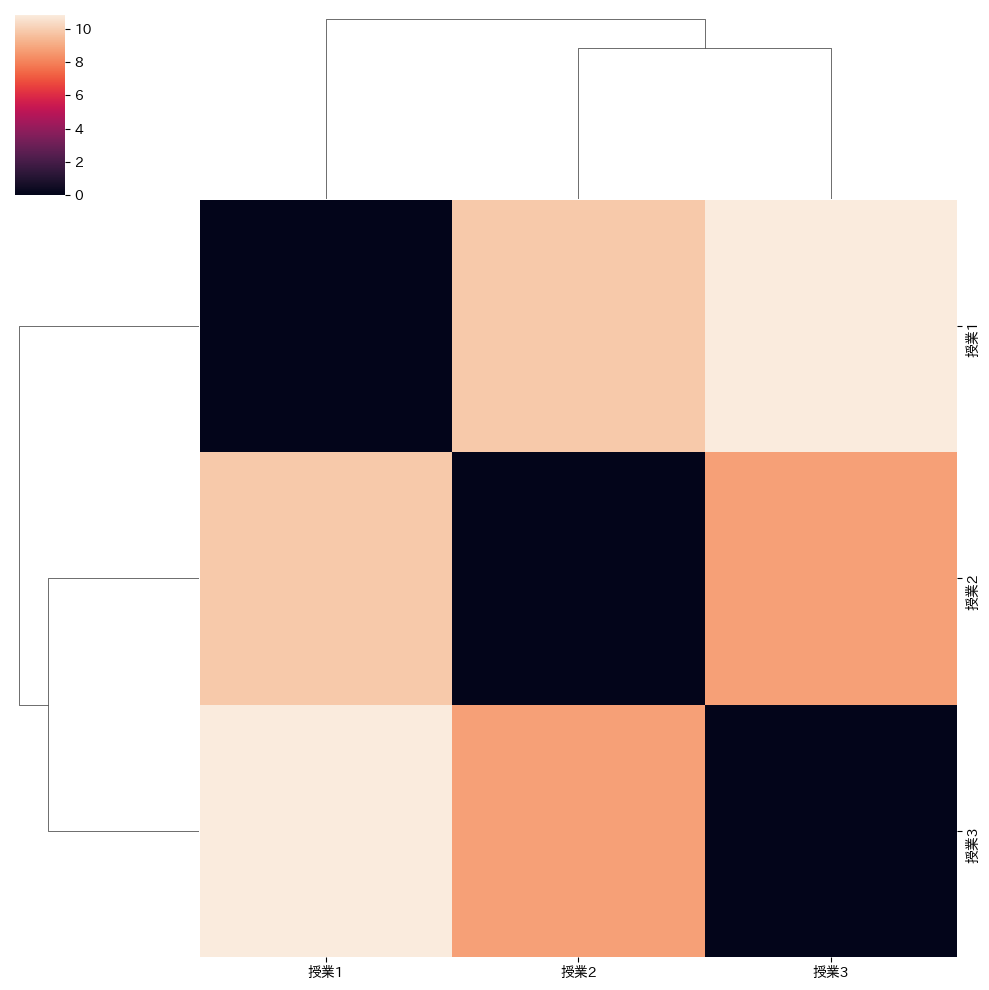

In [90]:
cor_mat = pd.DataFrame(mat, index=df.index, columns=df.index)
sns.clustermap(cor_mat,)# cmap='RdBu_r')

In [91]:
new_array = [model.infer_vector(doc) for doc in [['生命'], ['情報']]]
new_name = ['生命', '情報']
df = pd.DataFrame(np.concatenate((array, new_array)), index=name+new_name)
print(df)
tsne_result = t_sne.fit_transform(df)
tsne_result

           0         1         2         3         4         5         6   \
授業1 -0.008531 -0.016058 -0.002999 -0.022263 -0.042948  0.029626  0.005769   
授業2 -0.099461  0.097052  0.017905 -0.043589  0.094087  0.007669  0.052993   
授業3 -0.013813  0.083109  0.026311 -0.031229  0.029770  0.021966  0.011765   
生命  -0.039532  0.074875 -0.000636 -0.031692  0.019623  0.043095  0.005404   
情報  -0.062816  0.025110  0.018563  0.012302  0.017038  0.009506  0.039670   

           7         8         9   ...        90        91        92  \
授業1 -0.012503  0.018418  0.006822  ...  0.039857  0.042049  0.004369   
授業2 -0.087184  0.022806  0.062766  ...  0.020893 -0.102555 -0.031815   
授業3 -0.059373  0.012604  0.036291  ...  0.016328 -0.052543  0.018395   
生命  -0.025227  0.026649  0.019470  ... -0.010062 -0.046176 -0.050833   
情報  -0.037340  0.016768  0.015894  ...  0.004768 -0.064548 -0.009911   

           93        94        95        96        97        98        99  
授業1 -0.046361  0.049553 -0.0

array([[ -9.95792  , -99.9539   ],
       [-60.68208  ,  71.88122  ],
       [ 36.885506 , -30.28837  ],
       [-28.59102  , -17.944336 ],
       [  1.5456475,  29.112951 ]], dtype=float32)

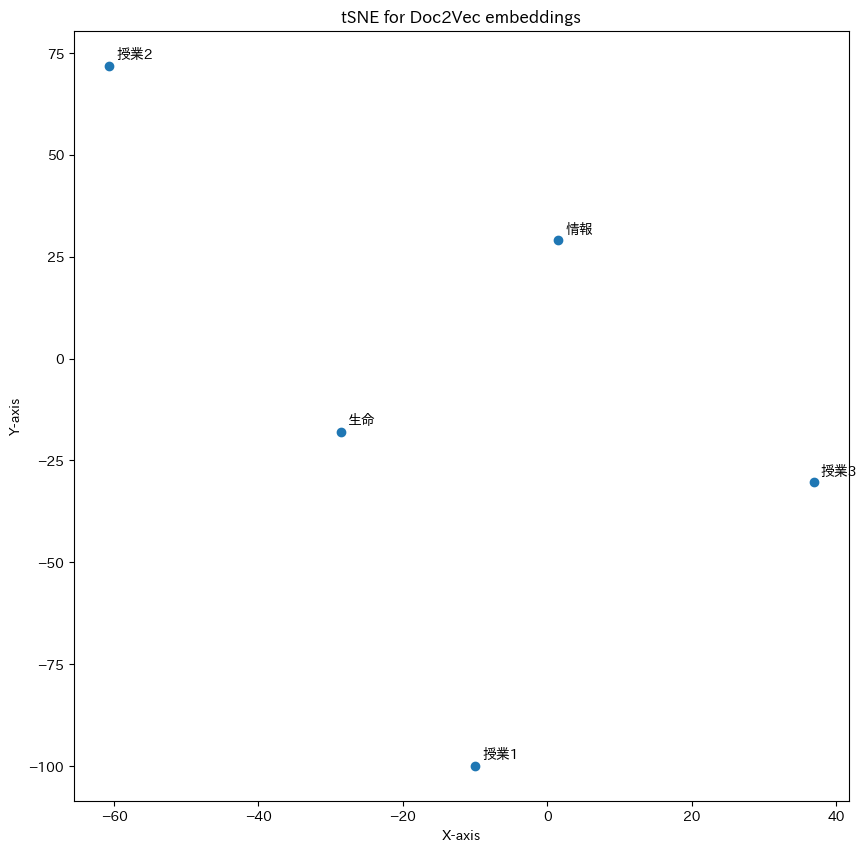

In [92]:
x, y = tsne_result[:,0], tsne_result[:,1]
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
for i, label in enumerate(name+new_name):
    plt.annotate(label, (x[i], y[i]), xytext=(5, 5), textcoords='offset points')
plt.title("tSNE for Doc2Vec embeddings")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [94]:
mat = np.zeros((df.shape[0], df.shape[0]))
new_docs = docs+new_name
print(len(new_docs))
print(new_docs)
for i in range(len(new_docs)):
    for j in range(len(new_docs)):
        if j < i:
            continue
        if j == i:
            mat[i,j] = 0
            mat[j,i] = 0
        else:
            dist = model.wv.wmdistance(new_docs[i], new_docs[j])
            mat[i,j] = dist
            mat[j,i] = dist
print(mat.shape)

5
[['高次元', '生命', '情報', 'の', '数理'], ['生命', '科学', 'に', 'おける', '振動', '現象', 'や', '同期', 'の', '本質', 'を', '理解', 'する'], ['データ', '駆動', '生物', '学', 'に', '関する', '先端', '研究', 'に', 'ついて', 'の', '議論'], '生命', '情報']
(5, 5)


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


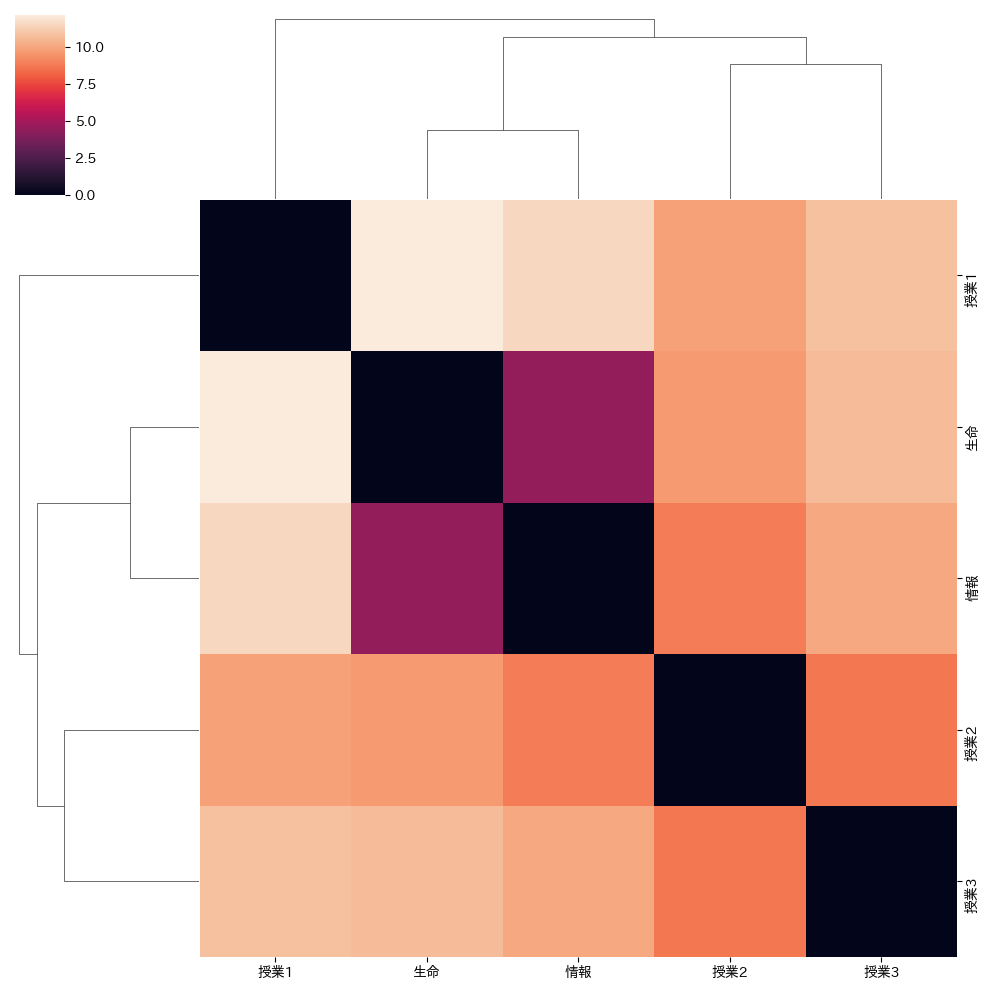

In [95]:
cor_mat = pd.DataFrame(mat, index=df.index, columns=df.index)
sns.clustermap(cor_mat)

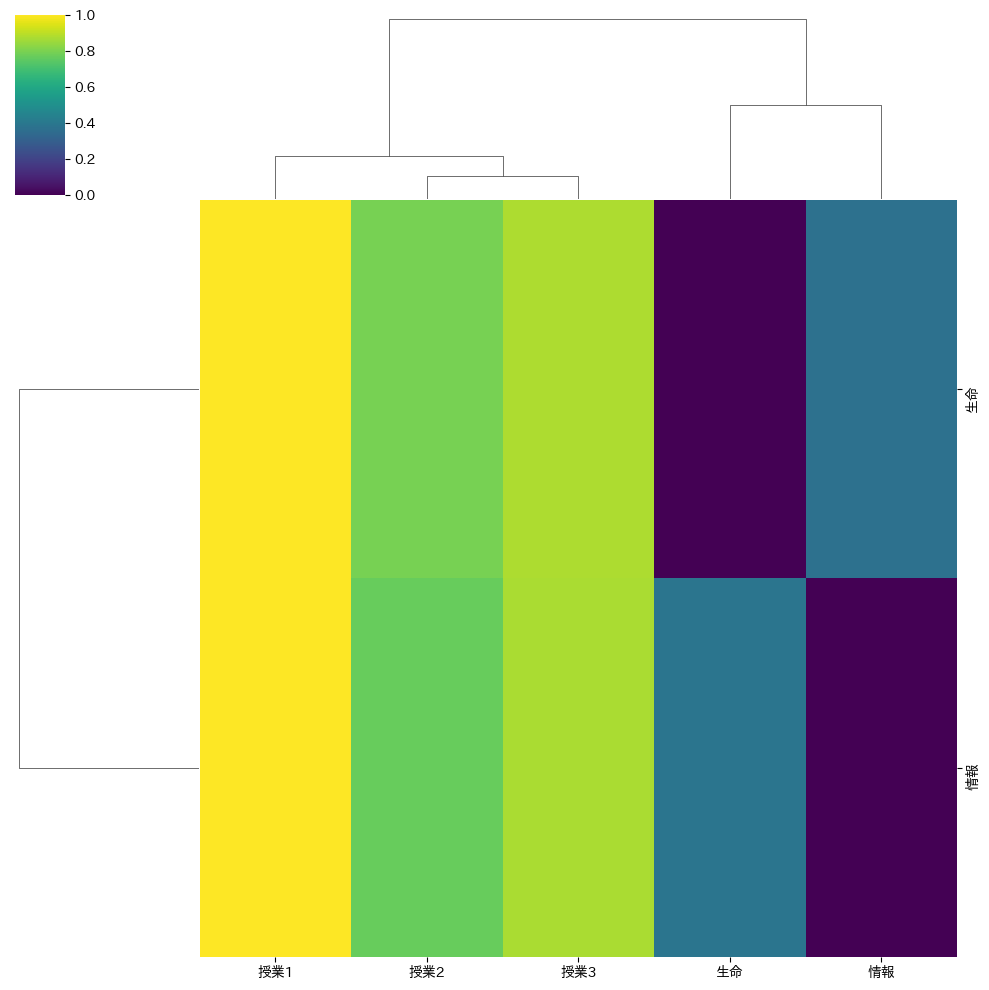

In [96]:
sns.clustermap(cor_mat.iloc[-2:23,0:21], standard_scale=0, cmap='viridis')